<a href="https://colab.research.google.com/github/vy-phung/Data-analysis/blob/main/No_Show_Medical_Appointment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this data analysis is to find if receiving SMS or not is associated with the customers show up or not show up in Medical appointment.

In addition, I wil analyse others factors especially the factor of scheduled in the same day or in advance the Medical appointment may effect the relationship between SMS_received and no-show appointment. 


Data source: https://www.kaggle.com/joniarroba/noshowappointments/home 
 (In this data source there is also the explanation for variable name)

I will use logistic regression for this analysis. 

In [5]:
#@title Import packages 
# Package
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
# import the visualization package
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### **Import data**

In [6]:
noshow = pd.read_csv('/content/KaggleV2-May-2016.csv')
noshow

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
print(noshow.dtypes)

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


In [6]:
print("number of NaN values for the column No-show :", noshow['No-show'].isnull().sum())
print("number of NaN values for the column SMS_received :", noshow['SMS_received'].isnull().sum())
print("number of NaN values for the column ScheduledDay :", noshow['ScheduledDay'].isnull().sum())
print("number of NaN values for the column AppointmentDay :", noshow['AppointmentDay'].isnull().sum())

number of NaN values for the column No-show : 0
number of NaN values for the column SMS_received : 0
number of NaN values for the column ScheduledDay : 0
number of NaN values for the column AppointmentDay : 0


### **Exploratory data analysis**

In [7]:
no_show = []
for term in noshow['No-show']:
  if term == 'No':
    no_show.append(0)
  elif term == 'Yes':
    no_show.append(1)
df = pd.Series(no_show, name='noshow')
noshow = pd.concat([noshow, df], axis=1)
noshow

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,0
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,0
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,0
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,0


In [29]:
noshow.to_csv('noshow.csv')

No     88208
Yes    22319
Name: No-show, dtype: int64


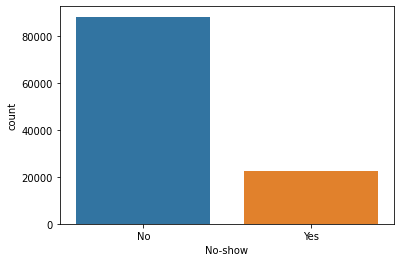

In [11]:
print(noshow['No-show'].value_counts())
sns.countplot(data=noshow,x = 'No-show')

0    75045
1    35482
Name: SMS_received, dtype: int64


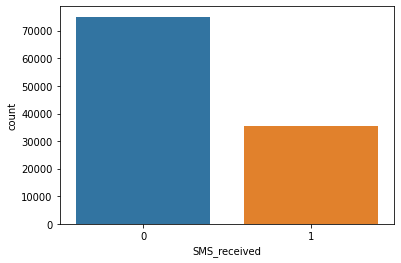

In [12]:
print(noshow['SMS_received'].value_counts())
sns.countplot(data=noshow,x = 'SMS_received')

In [ ]:
x = noshow[['AppointmentDay','ScheduledDay']]
x 

,AppointmentDay,ScheduledDay
0,2016-04-29T00:00:00Z,2016-04-29T18:38:08Z
1,2016-04-29T00:00:00Z,2016-04-29T16:08:27Z
2,2016-04-29T00:00:00Z,2016-04-29T16:19:04Z
3,2016-04-29T00:00:00Z,2016-04-29T17:29:31Z
4,2016-04-29T00:00:00Z,2016-04-29T16:07:23Z
...,...,...
110522,2016-06-07T00:00:00Z,2016-05-03T09:15:35Z
110523,2016-06-07T00:00:00Z,2016-05-03T07:27:33Z
110524,2016-06-07T00:00:00Z,2016-04-27T16:03:52Z
110525,2016-06-07T00:00:00Z,2016-04-27T15:09:23Z


In [ ]:
month = []
year = []
for i in noshow['ScheduledDay']:
  schedule = i.split('-') 
  if schedule[0] == '2015':  year.append('2015')
  elif schedule[0] == '2016':  year.append('2016')
  if schedule[1] == '01':  month.append('Jan')
  elif schedule[1] == '02':  month.append('Feb')
  elif schedule[1] == '03':  month.append('Mar')
  elif schedule[1] == '04':  month.append('Apr')
  elif schedule[1] == '05':  month.append('May')
  elif schedule[1] == '06':  month.append('Jun')
  elif schedule[1] == '07':  month.append('Jul')
  elif schedule[1] == '08':  month.append('Aug')
  elif schedule[1] == '09':  month.append('Sep')
  elif schedule[1] == '10':  month.append('Oct')
  elif schedule[1] == '11':  month.append('Nov')
  elif schedule[1] == '12':  month.append('Dec')
Scheduled1 = pd.Series(month, name='Month_Sched')
Scheduled2 = pd.Series(year, name='Year_Sched')
x = pd.concat([x, Scheduled1, Scheduled2], axis=1)
x

,AppointmentDay,ScheduledDay,Month_Sched,Year_Sched
0,2016-04-29T00:00:00Z,2016-04-29T18:38:08Z,Apr,2016
1,2016-04-29T00:00:00Z,2016-04-29T16:08:27Z,Apr,2016
2,2016-04-29T00:00:00Z,2016-04-29T16:19:04Z,Apr,2016
3,2016-04-29T00:00:00Z,2016-04-29T17:29:31Z,Apr,2016
4,2016-04-29T00:00:00Z,2016-04-29T16:07:23Z,Apr,2016
...,...,...,...,...
110522,2016-06-07T00:00:00Z,2016-05-03T09:15:35Z,May,2016
110523,2016-06-07T00:00:00Z,2016-05-03T07:27:33Z,May,2016
110524,2016-06-07T00:00:00Z,2016-04-27T16:03:52Z,Apr,2016
110525,2016-06-07T00:00:00Z,2016-04-27T15:09:23Z,Apr,2016


In [ ]:
month = []
year = []
for i in noshow['AppointmentDay']:
  appday = i.split('-') 
  if appday[0] == '2015':  year.append('2015')
  elif appday[0] == '2016':  year.append('2016')
  if appday[1] == '01':  month.append('Jan')
  elif appday[1] == '02':  month.append('Feb')
  elif appday[1] == '03':  month.append('Mar')
  elif appday[1] == '04':  month.append('Apr')
  elif appday[1] == '05':  month.append('May')
  elif appday[1] == '06':  month.append('Jun')
  elif appday[1] == '07':  month.append('Jul')
  elif appday[1] == '08':  month.append('Aug')
  elif appday[1] == '09':  month.append('Sep')
  elif appday[1] == '10':  month.append('Oct')
  elif appday[1] == '11':  month.append('Nov')
  elif appday[1] == '12':  month.append('Dec')
Scheduled1 = pd.Series(month, name='Month_App')
Scheduled2 = pd.Series(year, name='Year_App')
x = pd.concat([x, Scheduled1, Scheduled2], axis=1)
x

,AppointmentDay,ScheduledDay,Month_Sched,Year_Sched,Month_App,Year_App
0,2016-04-29T00:00:00Z,2016-04-29T18:38:08Z,Apr,2016,Apr,2016
1,2016-04-29T00:00:00Z,2016-04-29T16:08:27Z,Apr,2016,Apr,2016
2,2016-04-29T00:00:00Z,2016-04-29T16:19:04Z,Apr,2016,Apr,2016
3,2016-04-29T00:00:00Z,2016-04-29T17:29:31Z,Apr,2016,Apr,2016
4,2016-04-29T00:00:00Z,2016-04-29T16:07:23Z,Apr,2016,Apr,2016
...,...,...,...,...,...,...
110522,2016-06-07T00:00:00Z,2016-05-03T09:15:35Z,May,2016,Jun,2016
110523,2016-06-07T00:00:00Z,2016-05-03T07:27:33Z,May,2016,Jun,2016
110524,2016-06-07T00:00:00Z,2016-04-27T16:03:52Z,Apr,2016,Jun,2016
110525,2016-06-07T00:00:00Z,2016-04-27T15:09:23Z,Apr,2016,Jun,2016


### **Statistical analysis in R**

In [20]:
%load_ext rpy2.ipython

In [30]:
%%R
noshow <- read.csv("/content/noshow.csv")
head(noshow)

  X    PatientId AppointmentID Gender         ScheduledDay       AppointmentDay
1 0 2.987250e+13       5642903      F 2016-04-29T18:38:08Z 2016-04-29T00:00:00Z
2 1 5.589978e+14       5642503      M 2016-04-29T16:08:27Z 2016-04-29T00:00:00Z
3 2 4.262962e+12       5642549      F 2016-04-29T16:19:04Z 2016-04-29T00:00:00Z
4 3 8.679512e+11       5642828      F 2016-04-29T17:29:31Z 2016-04-29T00:00:00Z
5 4 8.841186e+12       5642494      F 2016-04-29T16:07:23Z 2016-04-29T00:00:00Z
6 5 9.598513e+13       5626772      F 2016-04-27T08:36:51Z 2016-04-29T00:00:00Z
  Age     Neighbourhood Scholarship Hipertension Diabetes Alcoholism Handcap
1  62   JARDIM DA PENHA           0            1        0          0       0
2  56   JARDIM DA PENHA           0            0        0          0       0
3  62     MATA DA PRAIA           0            0        0          0       0
4   8 PONTAL DE CAMBURI           0            0        0          0       0
5  56   JARDIM DA PENHA           0            1       

#### Unadjusted data

In [31]:
%%R
result_un = glm(noshow$noshow ~ noshow$SMS_received, family = binomial)
summary(result_un)


Call:
glm(formula = noshow$noshow ~ noshow$SMS_received, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8033  -0.6046  -0.6046  -0.6046   1.8919  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.606802   0.009786 -164.19   <2e-16 ***
noshow$SMS_received  0.641137   0.015391   41.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111206  on 110526  degrees of freedom
Residual deviance: 109503  on 110525  degrees of freedom
AIC: 109507

Number of Fisher Scoring iterations: 4



In [32]:
%%R
coef(result_un)

        (Intercept) noshow$SMS_received 
          -1.606802            0.641137 


#### Adjusted data

### **Predicting and classifying**

In [8]:
x1 = noshow[['SMS_received']]
y = noshow[['No-show']]
lr = LogisticRegression()
lr.fit(x1,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [9]:
print(lr.predict(noshow[['SMS_received']])[0:5])
print(noshow[['No-show']].values[0:5])

['No' 'No' 'No' 'No' 'No']
[['No']
 ['No']
 ['No']
 ['No']
 ['No']]


#### Train and test data

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.20, random_state=0)
lr.fit(x_train,y_train)
print(x_train.di)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [16]:
print(lr.predict(x_test)[0:5])
print(y_test.values[0:5])

['No' 'No' 'No' 'No' 'No']
[['No']
 ['No']
 ['No']
 ['No']
 ['Yes']]


In [15]:
print("confusion matrix:",metrics.confusion_matrix(y_test, lr.predict(x_test)))
print("Accuracy:",metrics.accuracy_score(y_test, lr.predict(x_test)))
print("Precision:",metrics.precision_score(y_test, lr.predict(x_test), average="binary", pos_label="No")) # pos_label: positive value

confusion matrix: [[17725     0]
 [ 4381     0]]
Accuracy: 0.8018185108115444
Precision: 0.8018185108115444
